***HW2 - Detecting Type 1 Diabetes***

# Theory Assignment

**A1**

For our opinion, when it comes to healthcare ML algorithms, Accuracy is more important than performance.
Because we're speaking on human lives, it is better to be more precise than, for example, when estimating house value.

האם התכוונו כאן לביצועיות של המודל? כלומר למהירות בה הוא מגיע לתוצאות?

**A2**

Too many features is often a bad thing. It may lead to Overfitting, meaning that the fitting of your parameters is too tightly to the training data. This results in model discovering random noise in the finite training set instead of the wider relationship between the features and the output variable. Consequently, the model will often perform very well on the training data but perform quite poorly on the test data.
In conclusion, overfitting may be done due to choosing all features, especially whenn taking irrelevant feature like income.

On the other hand, choosing only 2 features for such complex problem may cause under-fitting. meaning that both training accuracy and testing accuracy will be poor.


# Coding Assignment:

Import and load packages:

In [1]:
import pandas as pd 
import numpy as np
from pathlib import Path
import random
import distutils
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#from Additional_functions import *

# **Q1 - Data loading and preprocessing:**

In [3]:
def nan2num(dataframe):
    """
    :param dataframe: Pandas series of features
    :return: A pandas dataframe of the dictionary c_cdf containing the "clean" features
    """
    # dataframe = pd.DataFrame(dataframe).drop(extra_feature, 1)
    c_cdf = {}
    c_cdf = dataframe
    for column in dataframe.columns:
        if column == 'Age':
            i=0
        else:
            replacing_value = np.random.choice(dataframe[column])
            c_cdf[column].replace(to_replace= np.nan , value=replacing_value, inplace = True)
    return pd.DataFrame(c_cdf)

def str_to_bool_series(s_orig):
    s = s_orig.copy()
    for index, value in s.items():
        if(value=='Yes'):
            s[index] = 1
        elif(value=='No'):
            s[index] = 0
        elif(value=='Male'):
            s[index] = 1
        elif(value == 'Female'):
            s[index] = 0
        elif(value=='Positive'):
            s[index] = 1
        elif (value == 'Negative'):
            s[index] = 0
#         elif(value==1):
#             s[index] = True
#         elif(value==0):
#             s[index] = False
    return s

Load data:

In [4]:
df_orig = pd.read_csv('HW2_data.csv')

Transfer all data to numeric values:

In [6]:

df = df_orig
for column in df.columns:
    df[column] = str_to_bool_series(df_orig[column])
df.tail()

,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
560,54,1,1,1,1,1,0,NaN,1,1,1,1,1,1,0,0,1,0
561,32,1,0,0,0,0,0,NaN,0,0,1,1,0,0,0,1,1,0
562,61,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1
563,46,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0
564,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Clean NaN's:


In [7]:
t1d_clean = nan2num(df)
t1d_clean.tail()

,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
560,54,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1,0
561,32,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0
562,61,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1
563,46,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0
564,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Scale Age column:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaler

# **Q2 -  Split the data into Test Train 20%**

In [12]:
diagnosis = t1d_clean['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(t1d_clean, np.ravel(diagnosis), test_size=0.2,
                                                        random_state=0, stratify=np.ravel(diagnosis))

# **Q3 - Visualization and exploration of the data**



# Distribution of the features:

In [15]:
def print_dist_features(df, x_train, x_test):
    print("Feature            | Train % | Test % | Difference")
    for column in df:
        if(column=='Age'):
            age_mean_train = round(x_train[column].mean(),2)
            print(column ,end =  " "*(21-len(column))) 
            print(age_mean_train, end = " "*(5))
            age_mean_test = round(X_test[column].mean(),2)
            print(age_mean_test, end = " "*(5))
            difference = round(age_mean_train-age_mean_test,2)
            print(difference, end = " "*(5))
            print()
        elif(column=='Family History'):
            train_count = round(x_train[column].value_counts(ascending = True)/len(x_train[column])*100,2)
            test_count = round(x_test[column].value_counts(ascending = True)/len(x_test[column])*100,2)
            difference = round(train_count[1]-test_count[1],2)
            print(column, end=" "*(21-len(column)))
            print(train_count[1], end = " "*(10-len(str(train_count[1]))))
            print(test_count[1], end = " "*(10-len(str(test_count[1]))))
            print(difference)
        else:
            train_count = round(x_train[column].value_counts(ascending = True)/len(x_train[column])*100,2)
            test_count = round(x_test[column].value_counts(ascending = True)/len(x_test[column])*100,2)
            difference = round(train_count[1]-test_count[1],2)
            print(column, end=" "*(21-len(column)))
            print(train_count[1], end = " "*(10-len(str(train_count[1]))))
            print(test_count[1], end = " "*(10-len(str(test_count[1]))))
            print(difference)

print_dist_features(t1d_clean, X_train, X_test)

Feature            | Train % | Test % | Difference
Age                  48.18     48.12     0.06     
Gender               63.94     62.83     1.11
Increased Urination  48.23     48.67     -0.44
Increased Thirst     46.9      44.25     2.65
Sudden Weight Loss   40.93     46.02     -5.09
Weakness             56.42     60.18     -3.76
Increased Hunger     44.03     41.59     2.44
Genital Thrush       20.58     25.66     -5.08
Visual Blurring      45.8      41.59     4.21
Itching              50.22     46.02     4.2
Irritability         23.01     25.66     -2.65
Delayed Healing      46.9      43.36     3.54
Partial Paresis      42.7      42.48     0.22
Muscle Stiffness     38.27     38.94     -0.67
Hair Loss            34.29     41.59     -7.3
Obesity              17.48     14.16     3.32
Diagnosis            60.62     61.06     -0.44
Family History       50.22     52.21     -1.99


**A3 Section a**

Imbalance between train and test set could cause the learning algorithm to fail in classification of the test set.
Balance can be reached with stratification or normalization. in our case, due to the booleanic nature of the data, its better to do stratification.

# Relationship between feature and label:

These plots shows the relationsship between each feature and label. The age feature is shown in zoom-in plot because it has many details and was not clear in a small plot

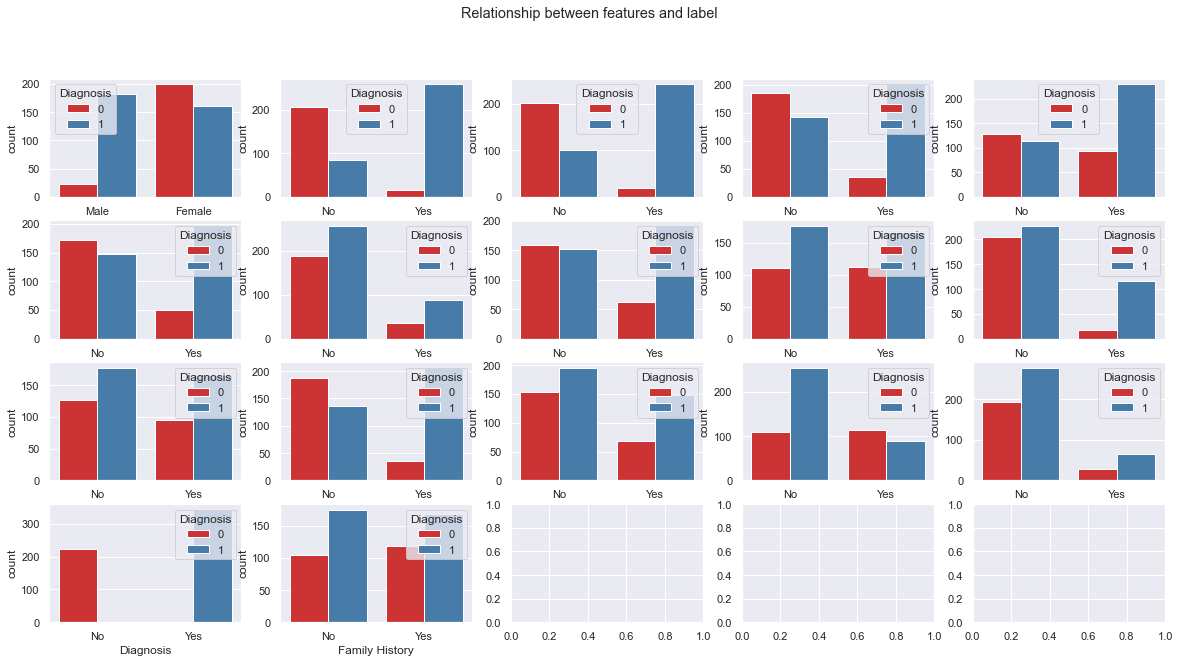

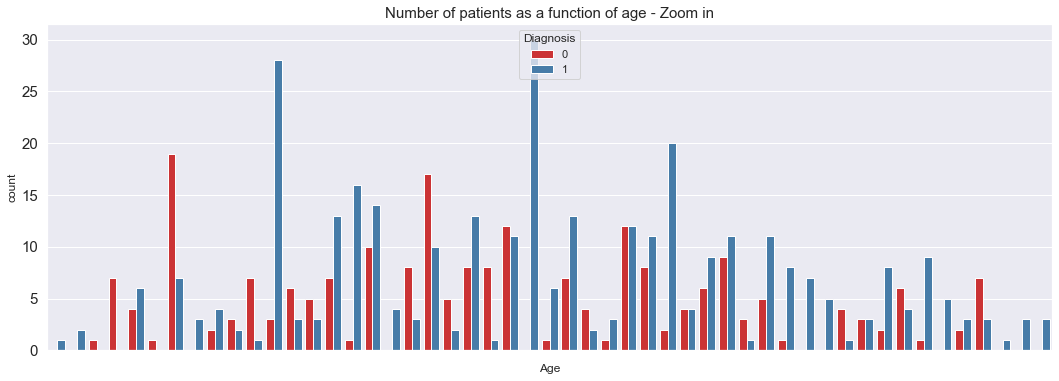

In [68]:
import seaborn as sbn
import matplotlib.ticker as ticker

def feature_corr(t1d_df):
    fig, axes = plt.subplots(4, 5,figsize=(20, 10) )
    sbn.set_context("paper", font_scale=0.7)
    sbn.set_theme(style="darkgrid", palette="Set1")
    fig.suptitle("Relationship between features and label")
    i=0
    for column in t1d_df:
        if(column=='Gender'):
            feat_lab = sbn.countplot(ax = axes[i//5,i%5], x='Gender', hue = 'Diagnosis', data = t1d_df)
            feat_lab.set(xticklabels=['Male', 'Female'])
        elif(column=='Age'):
            i-=1
#             feat_lab = sbn.countplot(ax = axes[i//5,i%5], x='Age', hue = 'Diagnosis', data = t1d_df)
#             feat_lab.xaxis.set_major_locator(ticker.LinearLocator(10))
        elif(i>=1):
            feat_lab = sbn.countplot(ax = axes[i//5,i%5], x=column, hue = 'Diagnosis', data = t1d_df)
            feat_lab.set(xticklabels=['No', 'Yes'])
        i+=1
    plt.subplots_adjust
    return()

feature_corr(t1d_clean)

fig, axes = plt.subplots(1, 1,figsize=(18, 6) )


# Plot Age seperately:
title_text = 'Number of patients as a function of age - Zoom in'
feat_lab = sbn.countplot(ax = axes, x='Age', hue = 'Diagnosis', data = t1d_clean)
feat_lab.xaxis.set_major_locator(ticker.LinearLocator(10))
feat_lab.set_title(title_text, fontsize=15)
axes.tick_params(axis='both', which='major', labelsize=15)

Additional plots:

In [32]:
X_train = X_train.drop(columns=['Diagnosis'])
X_test = X_test.drop(columns=['Diagnosis'])

KeyError: "['Diagnosis'] not found in axis"

# **Q4 - One Hot Vector**

**We have already done this step - manually - in the data pre-processing stage**

In [35]:
# Encode y_train and y_test and

from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(sparse=False)
y_train_ohe = encoder.fit_transform(pd.DataFrame(y_train))
y_test_ohe = encoder.fit_transform(pd.DataFrame(y_test))


# transform data
onehot = encoder.fit_transform(t1d_clean.drop(columns = ['Age']).drop(columns = ['Diagnosis']))
ohv_df = pd.DataFrame(onehot)

X_train_ohv, X_test_ohv, y_train_ohv, y_test_ohv = train_test_split(ohv_df, np.ravel(diagnosis), test_size=0.2,
                                                        random_state=0, stratify=np.ravel(diagnosis))
#print(X_train_ohv)
print(X_train)

X_train_ohv = X_train
X_test_ohv = X_test
y_train_ohv = y_train
y_test_ohv = y_test

     Age  Gender  Increased Urination  Increased Thirst  Sudden Weight Loss  \
6     43       1                    0                 0                   0   
404   38       1                    0                 0                   0   
359   46       1                    0                 0                   0   
322   52       1                    1                 1                   1   
97    55       0                    1                 1                   1   
..   ...     ...                  ...               ...                 ...   
271   53       1                    0                 0                   0   
147   39       0                    1                 1                   1   
24    40       1                    0                 0                   0   
269   35       1                    0                 0                   1   
547   50       0                    0                 1                   0   

     Weakness  Increased Hunger  Genital Thrush  Vi

Additional plots:

In [36]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import NuSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

In [37]:
from sklearn.metrics import log_loss, roc_auc_score
def cv_kfold(X, y, C, penalty, K):
    """   
    :param X: Training set samples
    :param y: Training set labels 
    :param C: A list of regularization parameters
    :param penalty: A list of types of norm
    :param K: Number of folds
    :return: A dictionary as explained in the notebook
    """
    kf = StratifiedKFold(n_splits=K)
    validation_dict = []
    for c in C:
        for p in penalty:
            logreg = LogisticRegression(solver='saga', penalty=p, C=c, max_iter=10000, multi_class='ovr')
            loss_val_vec = np.zeros(K)
            auc_vec = np.zeros(K)
            score_vec = np.zeros(K)
            k = 0
            for train_idx, val_idx in kf.split(X, y):
                x_train, x_val = X.iloc[train_idx], X.iloc[val_idx]
                y_train, y_val = y[train_idx],y[val_idx]
                y_pred,_=pred_log(logreg,x_train,y_train,x_val,flag = True)
                loss_val_vec[k]=log_loss(y_val,y_pred)
                auc_vec[k] = roc_auc_score(y_val, y_pred[:, 1])
                score_vec[k] = logreg.score(x_val, y_val)
                k=k+1
            validation_dict.append({'C':c,'penalty':p,'Mu':np.mean(loss_val_vec),'Sigma':np.std(loss_val_vec), 
                                   'AUC':auc_vec.max(), 'Score':score_vec.max()})
    return validation_dict


def pred_log(logreg, X_train, y_train, X_test, flag=False):
    """
    :param logreg: An object of the class LogisticRegression
    :param X_train: Training set samples
    :param y_train: Training set labels 
    :param X_test: Testing set samples
    :param flag: A boolean determining whether to return the predicted he probabilities of the classes (relevant after Q11)
    :return: A two elements tuple containing the predictions and the weightning matrix
    """
    # ------------------ IMPLEMENT YOUR CODE HERE:-----------------------------
    logreg.fit(X_train,y_train)
    if flag==True:
        y_pred_log = logreg.predict_proba(X_test)
    else:
        y_pred_log=logreg.predict(X_test)
    w_log=logreg.coef_
    # -------------------------------------------------------------------------
    return y_pred_log, w_log

In [38]:
def get_logreg_score(model, X_train_gs, X_test_gs, y_train_gs, y_test_gs):
    model.fit(X_train_gs, y_train_gs)
    scores = []
    y_pred = model.predict(X_test_gs)    
    scores.append(model.score(X_test_gs, y_test_gs))
    scores.append(roc_auc_score(y_test_gs,y_pred))
    scores.append(log_loss(y_test,y_pred))

**Test and Fit the models**

In [39]:
C = np.array([0.01, 0.1, 1, 5, 10, 100]) 
K = 5  
penalty = ['l1', 'l2']
val_dict = cv_kfold(X_train_ohv, y_train_ohv, C=C, penalty=penalty, K=K)
print(pd.DataFrame(val_dict))

# Insert best parameters to get the best model:

c = 1
p = 'l1'
lr_best_model = LogisticRegression(solver='saga', multi_class='ovr', penalty=p, C=c, max_iter=10000, random_state=10)
y_pred_best, _ = pred_log(lr_best_model, X_train_ohv, y_train_ohv, X_test_ohv)
y_pred_p_best, _ = pred_log(lr_best_model, X_train_ohv, y_train_ohv, X_test_ohv, flag=True)

         C penalty        Mu     Sigma       AUC     Score
0     0.01      l1  0.667225  0.010342  0.714646  0.611111
1     0.01      l2  0.485152  0.014136  0.974747  0.923077
2     0.10      l1  0.317495  0.045153  0.986869  0.923077
3     0.10      l2  0.296270  0.026425  0.980967  0.912088
4     1.00      l1  0.220255  0.041645  0.989198  0.955556
5     1.00      l2  0.225024  0.032167  0.985597  0.933333
6     5.00      l1  0.216916  0.039447  0.988169  0.933333
7     5.00      l2  0.217687  0.036550  0.985597  0.923077
8    10.00      l1  0.216924  0.039169  0.986111  0.933333
9    10.00      l2  0.217228  0.037611  0.986111  0.933333
10  100.00      l1  0.217021  0.038952  0.986626  0.933333
11  100.00      l2  0.217042  0.038784  0.986626  0.933333


In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

n_splits = K
skfold = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)
svc_model = SVC(probability=True)
C = np.array([1, 100, 1000])
pipeline = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc_model)])
svm_nonlinear = GridSearchCV(estimator=pipeline, param_grid={'svm__C': C, 'svm__kernel': ['rbf', 'poly'],
                        'svm__gamma': ['auto', 'scale']}, scoring=['roc_auc'],
                        cv=skfold, refit='roc_auc', verbose=0, return_train_score=True)
svm_nonlinear.fit(X_train_ohv, y_train_ohv)

best_svm_nonlin = svm_nonlinear.best_estimator_
print('Parameters to get best svm are:', svm_nonlinear.best_params_)

Parameters to get best svm are: {'svm__C': 100, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}


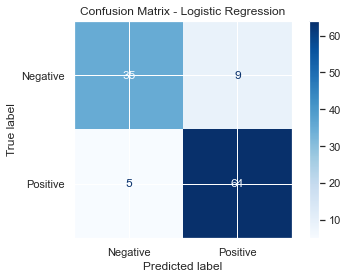

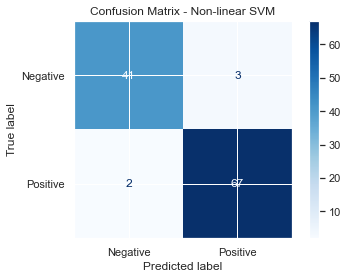

In [43]:
from sklearn.metrics import plot_confusion_matrix


disp_lr = plot_confusion_matrix(lr_best_model, X_test_ohv, y_test_ohv,
                                 display_labels=['Negative', 'Positive'],
                                 cmap=plt.cm.Blues)
disp_lr.ax_.set_title("Confusion Matrix - Logistic Regression")

disp_svm = plot_confusion_matrix(best_svm_nonlin, X_test_ohv, y_test_ohv,
                                 display_labels=['Negative', 'Positive'],
                                 cmap=plt.cm.Blues)
disp_svm.ax_.set_title("Confusion Matrix - Non-linear SVM")

plt.show()

# Q5 part b

Plot statistics for all algorithms:

In [44]:
# function that prints different parameters to evaluate the model 
def parameter_evaluation(y_test,y_train,y_test_pred,y_train_pred):
    print('Test set results:')
    print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_test_pred))) + "%")
    print("Precision is: " + str("{0:.2f}".format(100 * metrics.precision_score(y_test, y_test_pred))) + "%")
    print("recall is: " + str("{0:.2f}".format(100 * metrics.recall_score(y_test, y_test_pred))) + "%")
    print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_test_pred, average='macro'))) + "%")
    print("AUC is: " + str("{0:.2f}".format(100 * metrics.roc_auc_score(y_test,y_test_pred))) + "%"+'\n')
    print('Train set results:')
    print("Train accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_train, y_train_pred))) + "%")
    print("Train precision is: " + str("{0:.2f}".format(100 * metrics.precision_score(y_train, y_train_pred))) + "%")
    print("Train recall is: " + str("{0:.2f}".format(100 * metrics.recall_score(y_train, y_train_pred))) + "%")
    print("Train F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_train, y_train_pred, average='macro'))) + "%")
    print("Train AUC is: " + str("{0:.2f}".format(100 * metrics.roc_auc_score(y_train,y_train_pred))) + "%")

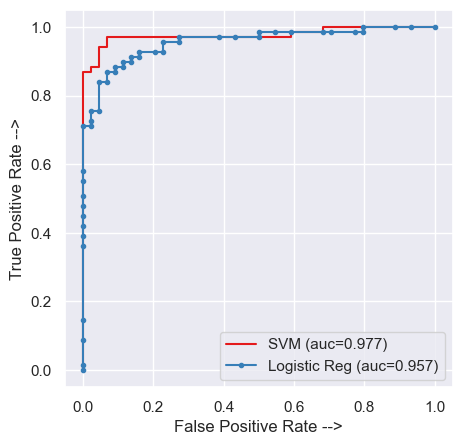

Logistic Regression Results:
Test set results:
Accuracy is: 87.61%
Precision is: 87.67%
recall is: 92.75%
F1 score is: 86.74%
AUC is: 86.15%

Train set results:
Train accuracy is: 91.37%
Train precision is: 92.11%
Train recall is: 93.80%
Train F1 score is: 90.92%
Train AUC is: 90.72%

SVM Results:
Test set results:
Accuracy is: 95.58%
Precision is: 95.71%
recall is: 97.10%
F1 score is: 95.33%
AUC is: 95.14%

Train set results:
Train accuracy is: 99.56%
Train precision is: 99.28%
Train recall is: 100.00%
Train F1 score is: 99.54%
Train AUC is: 99.44%


In [48]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
# lr = Logistic Regression
# svm = Support Vector Machine
model_lr = lr_best_model
model_svm = best_svm_nonlin
y_pred_lr = model_lr.decision_function(X_test_ohv)
lr_fpr, lr_tpr, threshold = roc_curve(y_test_ohv, y_pred_lr)
auc_lr = auc(lr_fpr, lr_tpr)

y_pred_svm = model_svm.decision_function(X_test_ohv)
svm_fpr, svm_tpr, threshold = roc_curve(y_test_ohv, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize = (5,5), dpi = 100)
plt.plot(svm_fpr, svm_tpr, linestyle = '-', label = 'SVM (auc=%0.3f)' %auc_svm)
plt.plot(lr_fpr, lr_tpr,marker='.' ,label = 'Logistic Reg (auc=%0.3f)' %auc_lr)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

print('Logistic Regression Results:')
y_pred_lr_train = (model_lr.predict(X_train_ohv)>0.5).astype("int32")
y_pred_lr_test = (model_lr.predict(X_test_ohv)>0.5).astype("int32")
parameter_evaluation(y_test_ohv,y_train_ohv,y_pred_lr_test,y_pred_lr_train)

print()
print('SVM Results:')
y_pred_svm_train = (model_svm.predict(X_train_ohv)>0.5).astype("int32")
y_pred_svm_test = (model_svm.predict(X_test_ohv)>0.5).astype("int32")
parameter_evaluation(y_test_ohv,y_train_ohv,y_pred_svm_test,y_pred_svm_train)

# **Q6 - Feature importance**

Feature: 0, Score: 0.10248
Feature: 1, Score: 0.10582
Feature: 2, Score: 0.26730
Feature: 3, Score: 0.12113
Feature: 4, Score: 0.04405
Feature: 5, Score: 0.02519
Feature: 6, Score: 0.02143
Feature: 7, Score: 0.02116
Feature: 8, Score: 0.02938
Feature: 9, Score: 0.03086
Feature: 10, Score: 0.03992
Feature: 11, Score: 0.03630
Feature: 12, Score: 0.06365
Feature: 13, Score: 0.01991
Feature: 14, Score: 0.03969
Feature: 15, Score: 0.02323
Feature: 16, Score: 0.00850


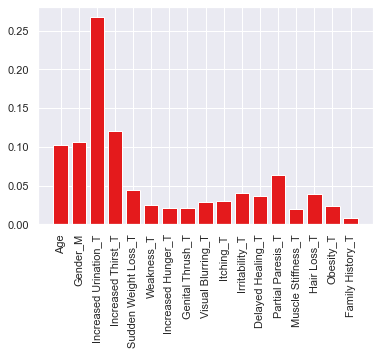

     Age  Gender  Increased Urination  Increased Thirst  Sudden Weight Loss  \
6     43       1                    0                 0                   0   
404   38       1                    0                 0                   0   
359   46       1                    0                 0                   0   
322   52       1                    1                 1                   1   
97    55       0                    1                 1                   1   
..   ...     ...                  ...               ...                 ...   
271   53       1                    0                 0                   0   
147   39       0                    1                 1                   1   
24    40       1                    0                 0                   0   
269   35       1                    0                 0                   1   
547   50       0                    0                 1                   0   

     Weakness  Increased Hunger  Genital Thrush  Vi

In [71]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)
# get importance
importance = model_rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
labels = ['Age','Gender_M', 'Increased Urination_T', 'Increased Thirst_T',
       'Sudden Weight Loss_T', 'Weakness_T',
        'Increased Hunger_T','Genital Thrush_T', 'Visual Blurring_T',  
        'Itching_T', 'Irritability_T','Delayed Healing_T',
        'Partial Paresis_T', 'Muscle Stiffness_T', 'Hair Loss_T',
        'Obesity_T','Family History_T']
t= np.arange(0,17)
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(t,labels, rotation='vertical')
plt.show()
print(X_train_ohv)